In [39]:
# !pip install qiskit
# !pip install pylatexenc
from qiskit import QuantumCircuit, Aer, assemble
from qiskit.visualization import plot_bloch_multivector, plot_histogram, array_to_latex
# Importing standard Qiskit libraries
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit import Aer, assemble
from qiskit.visualization import plot_histogram, plot_bloch_multivector, plot_state_qsphere, plot_state_city, plot_state_paulivec, plot_state_hinton

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Define backend
sim = Aer.get_backend('aer_simulator')

In [40]:
def createBellStates(inp1, inp2):
    qc = QuantumCircuit(2)
    qc.reset(range(2))

    if inp1=='1':
        qc.x(0)
    if inp2=='1':
        qc.x(1)

    qc.barrier()

    qc.h(0)
    qc.cx(0,1)

    qc.save_statevector()
    qobj = assemble(qc)
    result = sim.run(qobj).result()
    state = result.get_statevector()

    return qc, state, result

Note: Since these qubits are in entangled state, their state cannot be written as two separate qubit states. This also means that we lose information when we try to plot our state on separate Bloch spheres as seen below.



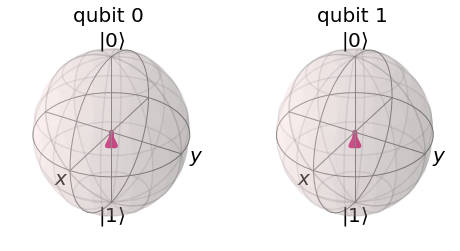

For inputs 0 0 Representation of Entangled States are:


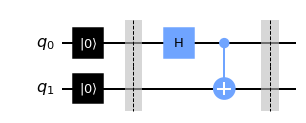

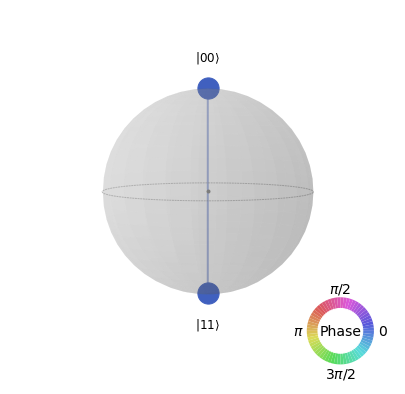

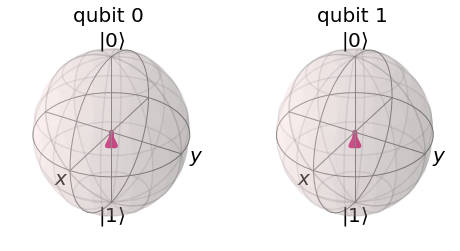

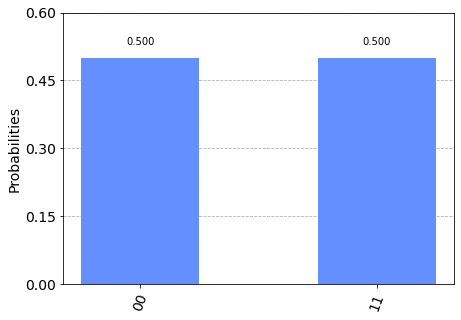

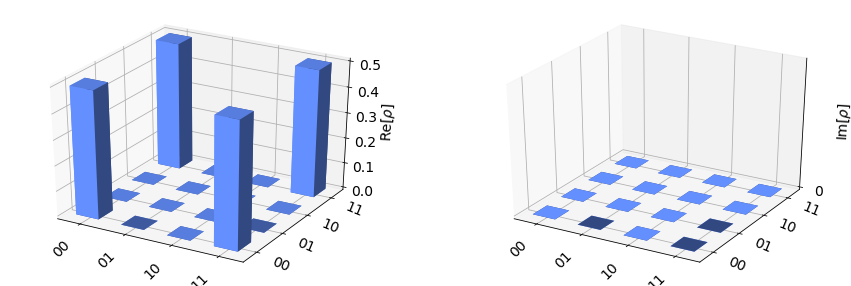

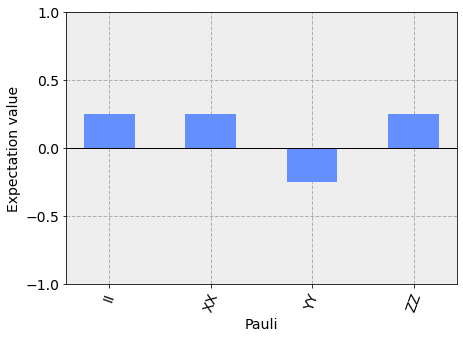

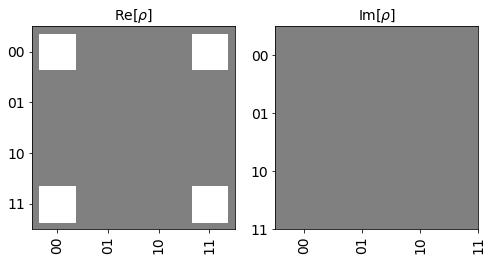



For inputs 0 1 Representation of Entangled States are:


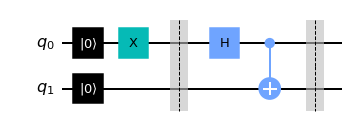

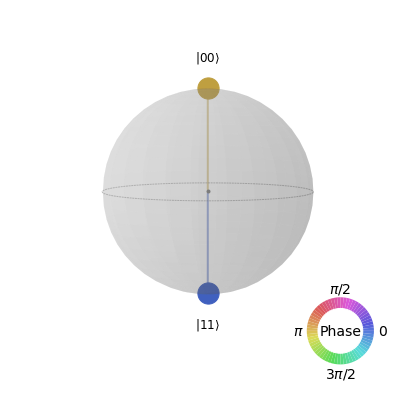

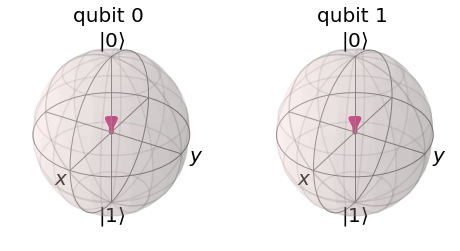

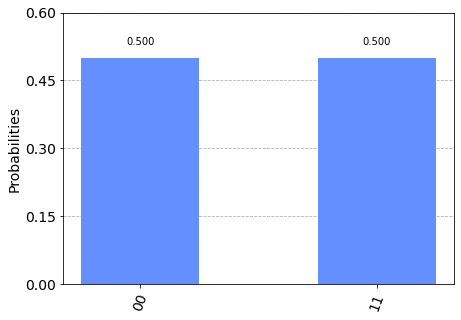

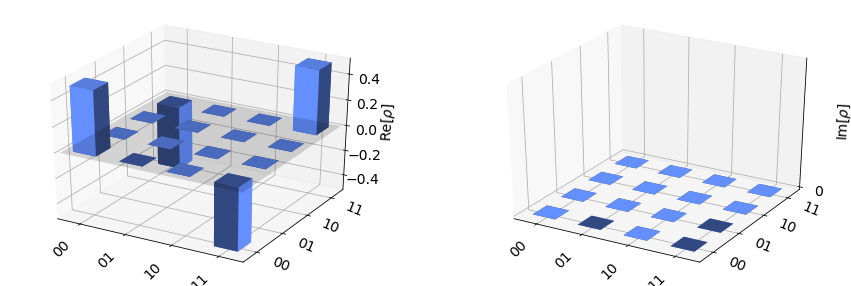

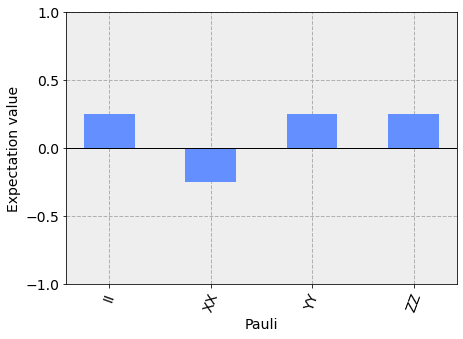

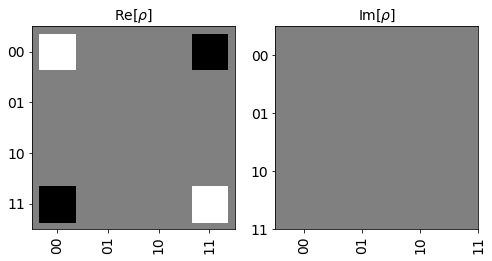



For inputs 1 0 Representation of Entangled States are:


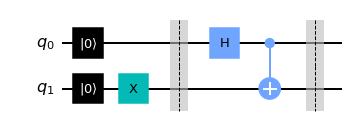

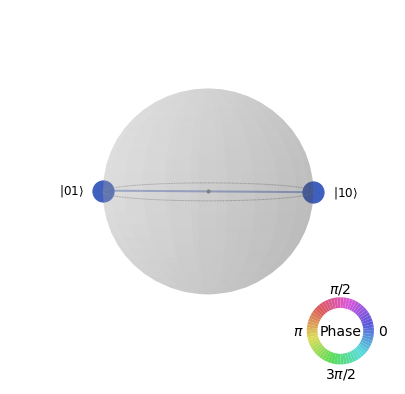

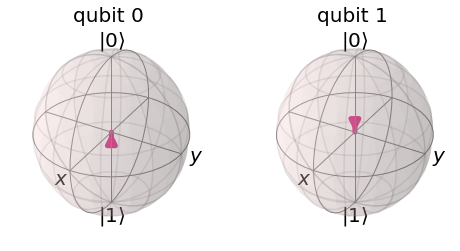

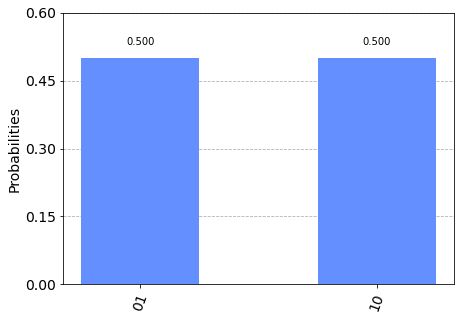

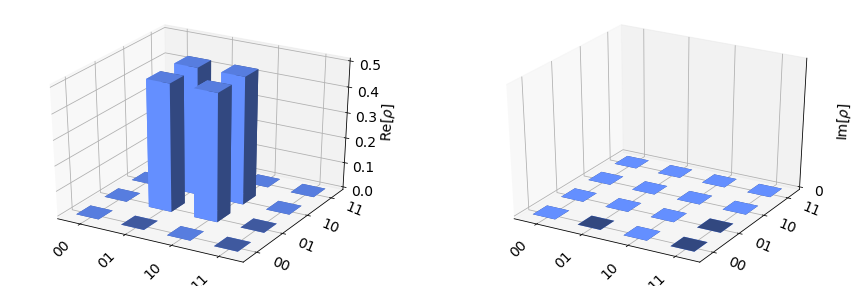

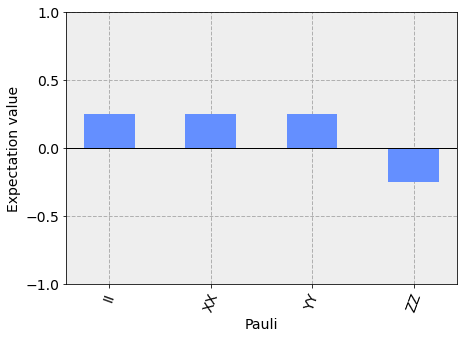

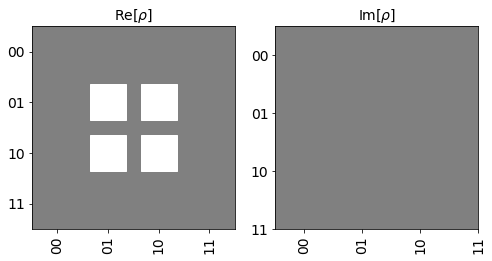



For inputs 1 1 Representation of Entangled States are:


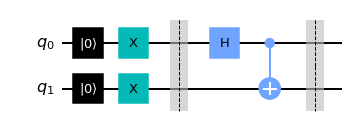

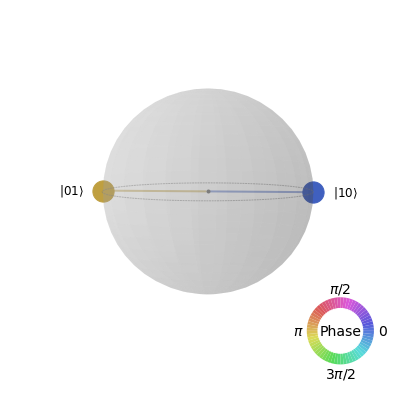

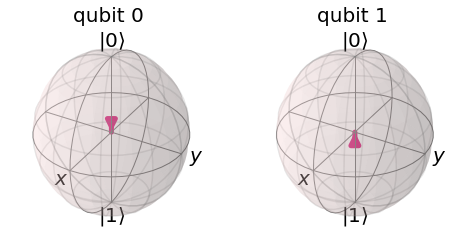

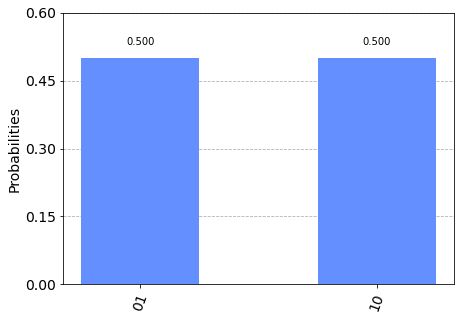

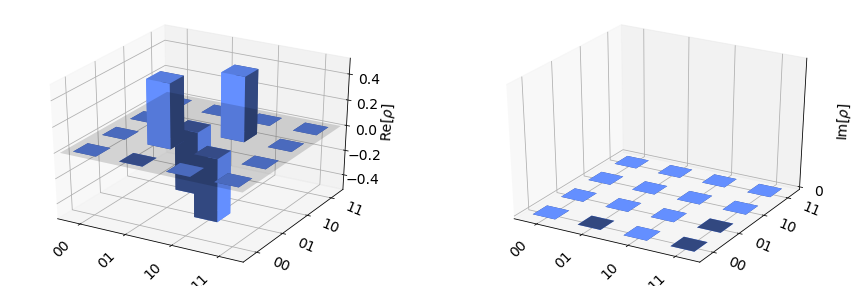

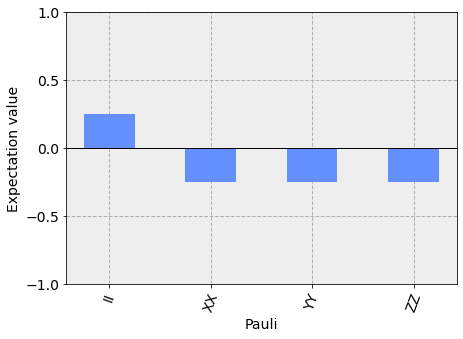

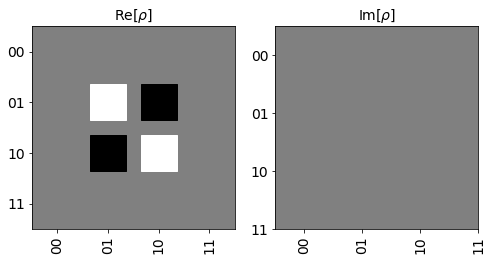

In [41]:
print('Note: Since these qubits are in entangled state, their state cannot be written as two separate qubit states. This also means that we lose information when we try to plot our state on separate Bloch spheres as seen below.\n')

inp1 = 0
inp2 = 1

qc, state, result = createBellStates(inp1, inp2)

display(plot_bloch_multivector(state))

# Uncomment below code in order to explore other states
for inp2 in ['0', '1']:
    for inp1 in ['0', '1']:
        qc, state, result = createBellStates(inp1, inp2)
        
        print('For inputs',inp2,inp1,'Representation of Entangled States are:')
        
        # Uncomment any of the below functions to visualize the resulting quantum states
        
        # Draw the quantum circuit
        display(qc.draw(output = 'mpl'))

        # Plot states on QSphere
        display(plot_state_qsphere(state))

        # Plot states on Bloch Multivector
        display(plot_bloch_multivector(state))

        # Plot histogram
        display(plot_histogram(result.get_counts()))
        
        # Plot state matrix like a city
        display(plot_state_city(state))

        # Represent state matix using Pauli operators as the basis
        display(plot_state_paulivec(state))

        # Plot state matrix as Hinton representation
        display(plot_state_hinton(state))
        
        print('\n')